## Libraries

In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import datetime
import seaborn as sns

from googletrans import Translator

## About the data

The data were collected from:
* [Petroleum National Agency Statistical Yearbook 2020](http://www.anp.gov.br/publicacoes/anuario-estatistico/anuario-estatistico-2020), ANP *(Portuguese: Agência Nacional de Petróleo)*, that consolidates data on the performance of the Brazilian oil, natural gas and biofuels industry and the national supply system in 2010-2019;
* [ANEEL](https://www.aneel.gov.br/dados/geracao) (Portuguese: Agência Nacional de Energia Elétrica) Generation by Source: 
History of the volume of electricity produced in the country in GWh, expressed by the values of energy load dispatched in the National Interconnected System - SIN, classified by renewable sources or not and the volume produced by generators not yet interconnected.
* [The World Bank](https://data.worldbank.org/country/brazil)

## Wrangling Data

### Looking at the data
#### ANP

The first step is to understand the data and know how it is stored. For that we will open the csv file and see it in its original form.

<img src="data_set/df1-page-001.jpg"  width="800" align="center">


#### The subject

It is a table, in Portuguese, about the production of Brazilian natural gas in million cubic meters during the years 2010-2019. This production is grouped by federation unit and followed by location. 

At federation unit (first) column, in addition to the gas producing states, on the top of it there is also the total and the subtotal of national production. 

The location can be categorized as onshore and as offshore, however the national production can also be categorized according to its geological layer, pre-salt and post-salt. 

The last column is the gas production ratio between 2019 and 2018.

At the bottom there are the table's source and an observation saying that the total value of production includes the volumes of reinjection, burning, reduction and own consumption.

#### Creating a DataFrame

Pandas will be used to read a csv file and create the dataframe.

In [512]:
df = pd.read_excel(r'data_set/anuario-2020-tabela-2_30.xls',  header = [0,2,3], index_col = [0,1])

Now lets take a look into how `df` will be displayed.

In [513]:
df.head()

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019 Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019  \
Capacidade de processamento (mil m3/dia)1                                                                                                                                   Capacidade de processamento (mil m3/dia)1   
2010                                                                                                                                                                                                             2011   
Total   76396                                                                                                                                         90396.0                                                           
        76396                                                                                                                                             NaN                                                           
Urucu   9706                                                                                                                                           9706.0                                                           
Lubnor  350                                                                                                                                             350.0                                                           
Guamaré 5700                                                                                                                                           5700.0                                                           

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2012   
Total   76396                                                                                               90396.0   
        76396                                                                                                   NaN   
Urucu   9706                                                                                                 9706.0   
Lubnor  350                                                                                                   350.0   
Guamaré 5700                                                                                                 5700.0   

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2013   
Total   76396                                                                                               90396.0   
        76396                                                                                                   NaN   
Urucu   9706                                                                                                 9706.0   
Lubnor  350                                                                                                   350.0   
Guamaré 5700                                                                                                 5700.0   

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2014   


It doesn't look good. Since the csv file is a multi-indexed table, it will be necessary to set the `head` and `index_col` parameters of the `pd.read_excel()` function, in order to make the correct indexation of the dataframe according to the original table. 

Looking again at the table, is easy to tell that rows `1, 3` and `4` goes for the `header` (columns labels) and the columns `A` and `B` goes for the `index_col` (index labels). It is important to notice that the parameters must be sended as index (e.g. column `A` refers to index `0`, and `B` to `1`.)

<img src="data_set/df1_header_index_col.png" width="800" height="240" align="center"/>

#### Reading Dataframe as a MultiIndexed Table

In [514]:
df = pd.read_excel(r'data_set/anuario-2020-tabela-2_30.xls',  header = [0,2,3], index_col = [0,1])


In [515]:
df.head()

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019 Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019  \
Capacidade de processamento (mil m3/dia)1                                                                                                                                   Capacidade de processamento (mil m3/dia)1   
2010                                                                                                                                                                                                             2011   
Total   76396                                                                                                                                         90396.0                                                           
        76396                                                                                                                                             NaN                                                           
Urucu   9706                                                                                                                                           9706.0                                                           
Lubnor  350                                                                                                                                             350.0                                                           
Guamaré 5700                                                                                                                                           5700.0                                                           

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2012   
Total   76396                                                                                               90396.0   
        76396                                                                                                   NaN   
Urucu   9706                                                                                                 9706.0   
Lubnor  350                                                                                                   350.0   
Guamaré 5700                                                                                                 5700.0   

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2013   
Total   76396                                                                                               90396.0   
        76396                                                                                                   NaN   
Urucu   9706                                                                                                 9706.0   
Lubnor  350                                                                                                   350.0   
Guamaré 5700                                                                                                 5700.0   

Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019           \
Capacidade de processamento (mil m3/dia)1                                                                             
2010                                                                                                           2014   


Now that we have the MultiIndexed configuration ready, we should drop all unnecessary rows and columns. 

In this specific table, the first two levels of column's labels can be dropped to improve its readability. But they are useful information that may need later on. So it is a good idea to keep those informations (title and unit). We also will need to translate some information to English, using `Translator()` class from `googletrans` package.

#### Saving and Translating Table's Title and Unit

In [516]:
translator = Translator()

In [517]:
title = translator.translate(df.columns[0][0]).text
title

'Table 2.30 - Evolution of natural gas processing capacity, according to producer poles - 2010-2019'

In [518]:
unit = translator.translate(df.columns[1][1]).text
unit

'Processing capacity (thousand m3 / day) 1'

#### Dropping Unnecessary Rows and Columns

Lets drop the two first MultiIndex level from columns.

##### First Two Levels From Column MultiIndex

In [519]:
df.columns = df.columns.droplevel(0)
df.columns = df.columns.droplevel(0)

In [520]:
df.head()

2010              2011     2012     2013     2014     2015     2016     2017  \
Total   76396  90396.0  90396.0  90396.0  96390.0  95350.0  95650.0  95650.0   
        76396      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
Urucu   9706    9706.0   9706.0   9706.0  12200.0  12200.0  12200.0  12200.0   
Lubnor  350      350.0    350.0    350.0    350.0    350.0    350.0    350.0   
Guamaré 5700    5700.0   5700.0   5700.0   5700.0   5700.0   5700.0   5700.0   

2010              2018      2019  
Total   76396  95650.0  107210.0  
        76396      NaN       NaN  
Urucu   9706   12200.0   12200.0  
Lubnor  350      350.0     350.0  
Guamaré 5700    5700.0    5700.0

##### NaN Rows and Columns

Now lets get rid off all NaN rows and columns.

In [521]:
df.dropna(how = 'all', inplace = True)
df.dropna(axis=1, how = 'all', inplace = True)
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total,76396,90396.0,90396.0,90396.0,96390.0,95350.0,95650.0,95650.0,95650.0,107210.0
Urucu,9706,9706.0,9706.0,9706.0,12200.0,12200.0,12200.0,12200.0,12200.0,12200.0
Lubnor,350,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0
Guamaré,5700,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0
Pilar,1800,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0
Atalaia,3000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
Candeias,2900,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0
Santiago²,4400,4400.0,4400.0,4400.0,1900.0,1900.0,2000.0,2000.0,2000.0,2000.0
Estação Vandemir Ferreira,6000,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
Cacimbas,16000,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,18100.0


##### Ratio Column

The last column is the ratio of gas production between 2018 and 2019. We can get this data with basic coding, so lets drop it.

In [522]:
if (df.iloc[:,-1].replace('..', 0).round().all() == (((df.iloc[:,-2]-df.iloc[:,-3])/df.iloc[:,-3])*100).round().all()):
    df = df.drop(df.columns[-1], axis=1)
    
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total,76396,90396.0,90396.0,90396.0,96390.0,95350.0,95650.0,95650.0,95650.0,107210.0
Urucu,9706,9706.0,9706.0,9706.0,12200.0,12200.0,12200.0,12200.0,12200.0,12200.0
Lubnor,350,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0
Guamaré,5700,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0
Pilar,1800,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0
Atalaia,3000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
Candeias,2900,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0
Santiago²,4400,4400.0,4400.0,4400.0,1900.0,1900.0,2000.0,2000.0,2000.0,2000.0
Estação Vandemir Ferreira,6000,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
Cacimbas,16000,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,18100.0


#### Correcting Index Labels

Now we need to correct the index's labels. 

As you can see, some of table are in Portuguese so we need to be able to translate from Portuguese to English, if is necessary.

##### Translating Index Labels

In [523]:
if df.index.nlevels > 1:
    
    for i, num in enumerate(df.index):
        for j in range(df.index.nlevels):
            if j==0:
                if (df.index[i][j] == 'Espírito_Santo') or (df.index[i][j] == 'Espirito_Santo'):
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Espírito_Santo','Espirito_Santo'), level = j)
                elif df.index[i][j] == 'Amazonas':
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Amazonas','Amazonas'), level = j)
                elif df.index[i][j] == 'Alagoas':
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Alagoas','Alagoas'), level = j)
                elif (df.index[i][j] == 'Ceará') or (df.index[i][j] == 'Ceara'):
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Ceará','Ceara'), level = j)
                elif (df.index[i][j] == 'Rio Grande do Norte') or (df.index[i][j] == 'Rio_Grande_do_Norte'):
                    df.index = df.index.set_levels(df.index.levels[j].str.replace(' ','_'), level = j)
                else:
                    df.index = df.index.set_levels(df.index.levels[j].str.replace(df.index[i][j], translator.translate(df.index[i][j]).text), level = j)
            if j==1:
                if df.index[i][j] == 'Mar': # checks if one of the words that the translate package can not translate
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Mar','Offshore'), level = j)
                elif df.index[i][j] == 'Terra': # checks if one of the words that the translate package can not translate
                    df.index = df.index.set_levels(df.index.levels[j].str.replace('Terra','Onshore'), level = j)
                elif not isinstance(df.index[i][j], str):
                    pass
                else:
                    df.index = df.index.set_levels(df.index.levels[j].str.replace(df.index[i][j], translator.translate(df.index[i][j]).text), level = j)
                    
elif df.index.nlevels == 1:
    new_index = []
    for index in df.index:
        if index == 'Reinjeção':
            new_index.append('Reinjection')
        else:
            new_index.append(translator.translate(index).text)
    df.index = new_index

In [524]:
if df.index.nlevels == 1:
    new_index = []
    for index in df.index:
        if index == 'Reinjeção':
            new_index.append('Reinjection')
        else:
            new_index.append(translator.translate(index).text)
    df.index = new_index

In [525]:
df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Total,76396,90396.0,90396.0,90396.0,96390.0,95350.0,95650.0,95650.0,95650.0,107210.0
Urucu,9706,9706.0,9706.0,9706.0,12200.0,12200.0,12200.0,12200.0,12200.0,12200.0
Lubnor,350,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0,350.0
Guamaré,5700,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0,5700.0
Pilar,1800,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0,1800.0
Atalaia,3000,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0,3000.0
Candles,2900,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0,2900.0
Santiago²,4400,4400.0,4400.0,4400.0,1900.0,1900.0,2000.0,2000.0,2000.0,2000.0
Vandemir Ferreira Station,6000,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
Cacimbas,16000,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,16000.0,18100.0


##### MyDataFrame Class

In order to capture and simplify access to some important informations *(e.g. title, unit)* about the tables collected, and to assembly all functions as methods in a the same place, a class was created. `MyDataFrame` class also perfomes some changes into the original tables to improve their readability and to translate some terms.

Parameters:

>`df`: is a csv file readed by pd.read_csv function.

>`translate`: is a boolean that calls the translate method.

>`translate_first_level`: is a boolean that says if the first level of a MultiIndex DataFrame should be translated or not, since some of them are proper noun and should not be translated.

>`white_space`: is a boolean that replace white space for underscore in all indexes, in case of using loc function.

>`drop_level`: is a boolean that calls the drop_levels method and drops column levels from a MultiIndex DataFrame until becames a Index DataFrame.


Atributes:

>`df`: is the DataFrame it self.

>`title`: is the DataFrame's title.

>`unit`: is the DataFrame's units.

Methods:

>`drop_na()`: drops all rows and columns that have all values equals to NaN.

> `drop_levels()`:  drops all levels that categorize the table itself, and not its values individually. However those informations are allocated as table's title and unit for later use.

>`index_translate_index()`: translate a index DataFrame to English.

>`index_translate_multi_index()`: translate a MultiIndex DataFrame to English.

>`drop_last_column()`: drop the last column if it has been configured as an unnamed column. The value of this column is a ratio that is redundant to our project.

Translations from Portuguese to English will also be performed within the class using `googletrans` package. The words that are not supported by the package will be translated directly using a dictionary.

In [527]:
class MyDataFrame: 
    def __init__(self, df, translate=False, translate_first_level=False, white_space=False, drop_level=True):
        
        self.df = df
        self.translator = Translator()
        self.title = ""
        self.unit = ""
        self.translate = translate
        self.translate_first_level = translate_first_level
        self.white_space= white_space
        self.drop_level = drop_level
        #self.ratio = (((self.df.iloc[:,-2]-self.df.iloc[:,-3])/self.df.iloc[:,-3])*100).round()
        #self.last_column = self.df.iloc[:,-1].replace('..', 0).round()
        
        self.drop_na()
        
        if self.df.index.nlevels > 1:
            self.title_unit_multiindex();
        
        if self.drop_level:
            self.drop_levels()
            
        #if (self.ratio == self.last_column).all():
        #   self.drop_last_column()
        
        
        if self.translate:
            if self.df.index.nlevels == 1:
                self.translate_index()
                
            
        if self.translate:
            if self.df.index.nlevels > 1:
                self.translate_multi_index()
        
        
        if self.white_space:
            self.replace_white_space()
            
            
    def title_unit_multiindex(self):
        self.title = self.df.columns[0][0]
        self.unit = self.df.columns[1][1]
            
    def drop_levels(self):
        """
        This method drops two column levels that contained the infos previously captured (table's title and unit)
        """     
        while self.df.columns.nlevels>1:
            self.df.columns = self.df.columns.droplevel(0)
            
            
    def drop_na(self):
        """
        This method drops all rows and columns that have all values equals to NaN.
        """  
        self.df.dropna(how = 'all', inplace = True)
        self.df.dropna(axis = 'columns', how = 'all', inplace = True)

    
    def translate_index(self):
        """
        This method translates the index of a DataFrame to English.
        """
        self.new_index = []
        for index in self.df.index:
            if index == 'Reinjeção':
                self.new_index.append('Reinjection')
            elif (index == 'Espírito Santo') or (index == 'Espirito_Santo'):
                self.new_index.append('Espirito_Santo')
            elif index == 'Amazonas':
                self.new_index.append('Amazonas')
            elif index == 'Alagoas':
                self.new_index.append('Alagoas')
            elif (index == 'Ceará') or (index == 'Ceara'):
                self.new_index.append('Ceara')
            elif (index == 'Rio Grande do Norte') or (index == 'Rio_Grande_do_Norte'):
                self.new_index.append('Rio_Grande_do_Norte')
            else:
                self.new_index.append(self.translator.translate(index).text)
        self.df.index = self.new_index
        
                        
    def translate_multi_index(self):
        """
        This method translates a MultiIndex DataFrame to English.
        """
        
        if self.translate_first_level == True:
            for i, num in enumerate(self.df.index):
                    for j in range(self.df.index.nlevels):       
                        if j==0:
                            if (self.df.index[i][j] == 'Espírito_Santo') or (self.df.index[i][j] == 'Espirito_Santo'):
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Espírito_Santo','Espirito_Santo'), level = j)
                            elif self.df.index[i][j] == 'Amazonas':
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Amazonas','Amazonas'), level = j)
                            elif self.df.index[i][j] == 'Alagoas':
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Alagoas','Alagoas'), level = j)
                            elif (self.df.index[i][j] == 'Ceará') or (self.df.index[i][j] == 'Ceara'):
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Ceará','Ceara'), level = j)
                            elif (self.df.index[i][j] == 'Rio Grande do Norte') or (self.df.index[i][j] == 'Rio_Grande_do_Norte'):
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace(' ','_'), level = j)
                            else:
                                self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace(self.df.index[i][j], self.translator.translate(self.df.index[i][j]).text), level = j)
        
        for i, num in enumerate(self.df.index):
            for j in range(self.df.index.nlevels):
                if j==0:
                    pass
                if j==1:
                    if self.df.index[i][j] == 'Mar': # checks if one of the words that the translate package can not translate
                        self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Mar','Offshore'), level = j)
                    elif self.df.index[i][j] == 'Terra': # checks if one of the words that the translate package can not translate
                        self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace('Terra','Onshore'), level = j)
                    elif not isinstance(self.df.index[i][j], str):
                        pass
                    else:
                        self.df.index = self.df.index.set_levels(self.df.index.levels[j].str.replace(self.df.index[i][j], self.translator.translate(self.df.index[i][j]).text), level = j)
        
        
    def replace_underscore(self):
        """
        This method replaces all underscore for white space.
        """
        if self.df.index.nlevels > 1: # tells how many level are
            for i, level in enumerate(range(self.df.index.nlevels)): # runs through levels
                #for j, value in enumerate(self.df.index.levels[i]): # runs through the level's value and replace white space for underline
                self.df.index = self.df.index.set_levels(self.df.index.levels[i].str.replace("_", " "), level = i)
        
        elif self.df.index.nlevels == 1:
            self.new_index = []
            for index in self.df.index:
                self.new_index.append(index.replace('_', ' '))
            self.df.index = self.new_index
            
            
    def drop_last_column(self):
        """
        This method drops the last column if it is a ration between columns[-2] and columns[-3] .
        """            
        self.df = self.df.drop(self.df.columns[-1], axis=1)

## Reading Data as MyDataFrameClass

### Total Reserves

* 'Tabela 2.5 – Reservas totais1 de gás natural, por localização (terra e mar), segundo Unidades da Federação2 – 2010-2019'

In [605]:
total_reserves = MyDataFrame(pd.read_excel(r'data_set/anuario-2020-tabela-2_5.xls',  header = [0,2,3], index_col = [0,1]), translate=True,)
total_reserves.drop_last_column()

### Processing

* 'Tabela 2.30 – Evolução da capacidade de processamento de gás natural, segundo polos produtores – 2010-2019'

In [604]:
processing = MyDataFrame(pd.read_excel(r'data_set/anuario-2020-tabela-2_30.xls',  header = [0,2,3], index_col = [0]))

### Proved Reserves

* 'Table 1.2 – Proved natural gas reserves1, per location (onshore and offshore), by State2 – 2010-2019'

In [600]:
proved_reserves = MyDataFrame(pd.read_excel(r'data_set/table-1_2.xls', header = [0,2,3], index_col = [0,1]))
proved_reserves.drop_last_column()

### Imports

* 'Table 1.23 – Natural gas imports, by country of origin – 2010-2019'

In [599]:
imports = MyDataFrame(pd.read_excel(r'data_set/table-1_23.xls', header = [0,2,3], index_col = [0,1]))
imports.drop_last_column()

### Domestic Sales

* 'Table 1.25 – Natural gas domestic sales by Brazilian Region and State – 2010-2019'

In [790]:
domestic_sale = MyDataFrame(pd.read_excel(r'data_set/table-1_25.xls', header = [0,2,3], index_col = [0]))
domestic_sale.drop_last_column()
domestic_sale.unit = '10⁶ m³'

### Balance

In [596]:
balance = MyDataFrame(pd.read_excel(r'data_set/table-1_26.xls', header = [0,2,3], index_col = [0]))
balance.drop_last_column()

* Supply

In [ ]:
supply = balance.df.loc[['Import','Production']].T

* Demand

In [801]:
demand = balance.df.iloc[[1,3,4,5,6,7]].T
demand

,Export,Reinjection,Gas flaring,Own consumption1,NGL2,Sales3
2010,0.000000,4369.053258,2417.758896,6744.762530,1335.038659,20457.563469
2011,50.220631,4037.731513,1756.226339,7802.974057,1286.725075,19307.265264
2012,312.300000,3542.732598,1444.516950,8850.031417,1281.447149,23284.159076
2013,37.381800,3883.004317,1302.885282,9077.946961,1336.773000,28783.642605
2014,90.466000,5739.690000,1619.208000,9335.072936,1505.328000,30768.358064
2015,1.870000,8866.713000,1397.675000,10851.056777,1380.795000,31502.467702
2016,517.481000,11069.494474,1484.082000,9359.798000,1540.860000,27224.483515
2017,134.520000,10076.841000,1377.136000,9630.178814,1851.088000,27490.860364
2018,80.136042,12811.951061,1358.206104,9352.726619,1896.362000,26050.725307
2019,0.000000,15776.669711,1589.738474,9393.638796,1960.897610,25854.502470


### Production

* 'Table 1.5 – Natural gas production, per location (onshore and offshore, pre-salt and post-salt), by State – 2010-2019'

In [595]:
production = MyDataFrame(pd.read_excel(r'data_set/table-1_5.xls', header = [0,2,3], index_col = [0,1]))
production.drop_last_column()
production.unit='10⁶ m³'

### Gas Type

* 'Table 1.6 – Production of associated and non-associated natural gas, by State – 2010-2019'

In [594]:
gas_type = MyDataFrame(pd.read_excel(r'data_set/table-1_6.xls', header = [0,2,3], index_col = [0,1]))
gas_type.drop_last_column()
gas_type.unit='10⁶ m³'

### Average Price

* 'Tabela 2.24 – Preços médios de referência do gás natural, segundo unidades da Federação – 2010-2019'

We need to give special attention to `table-1_2` because it is in a totally different format than the others. Our interest is to know the average Natural Gas price by `Region`, by `US$/mil m³`. So we need to select that specif range to generate a new DataFrame.

In [536]:
avg_price = MyDataFrame(pd.read_excel(r'data_set/anuario-2020-tabela-2_24.xls',  header = [0,2,3,4], index_col = [0]), drop_level=False)
avg_price.drop_levels()
avg_price.unit='US$/mil m³'

In [537]:
avg_price.df = avg_price.df.iloc[:,10:20]
avg_price.title='Average Natural Gas Price, According to Federation Unit'


#### Regions
Now lets create a `Average Natural Gas Price` DataFrame by `Region`.
Below are lists that define which units of the federation make up the Brazilian natural gas producing regions.

In [539]:
northeast = ['Alagoas', 'Bahia', 'Maranhão', 'Ceará', 'Rio Grande do Norte', 'Sergipe']
southeast = ['São Paulo', 'Espírito Santo', 'Rio de Janeiro']
north = ['Amazonas']
south = ['Paraná']

In [593]:
regions ={'North':avg_price.df.loc[north,:].sum(),
         'South':avg_price.df.loc[south,:].sum(),
         'Northeast':avg_price.df.loc[northeast,:].sum(),
         'Southeast':avg_price.df.loc[southeast,:].sum()}

avg_price_region = MyDataFrame(pd.DataFrame(data=regions))
avg_price_region.df = avg_price_region.df.T
avg_price_region.title='Average Natural Gas Price by Region'
avg_price_region.unit='US$/mil m³'

### Energy Eletric Matrix

* Brazilian Energy Matrix

In [592]:
energy_matrix = pd.read_csv(r'data_set/GeracaoFonte.csv')
energy_matrix.columns = ['ID', 'Energy Type', 'GWh', 'Month', 'Year', 'dthProx']
energy_matrix = pd.pivot_table(energy_matrix, values='GWh', index=['Energy Type'], columns=['Year', 'Month'])

### Indicators

* Brazilian Indicators

In [620]:
bra_ind = pd.read_csv('data_set/API_BRA_DS2_en_csv_v2_1221399.csv', skiprows=[0,1,2,3])
bra_ind

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Brazil,BRA,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.645229e+02,4.400993e+02,4.391118e+02,4.083911e+02,3.467673e+02,3.360651e+02,3.950354e+02,4.352213e+02,NaN,NaN
1,Brazil,BRA,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,8.470202e+00,8.093735e+00,8.847753e+00,4.723795e+00,5.239118e+00,4.675611e+00,4.058865e+00,3.785231e+00,5.951055e+00,NaN
2,Brazil,BRA,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,8.679376,8.905765,7.874607,7.190783,7.813120,7.845999,...,5.808892e-01,4.561996e-01,6.086314e-01,5.100723e-01,4.620673e-01,1.982536e-01,1.167305e-01,3.020044e+00,NaN,NaN
3,Brazil,BRA,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,15.859587,17.064510,24.108307,19.818271,...,4.539570e+00,4.757339e+00,4.881456e+00,4.901112e+00,5.156040e+00,7.400880e+00,6.581902e+00,5.635750e+00,5.761514e+00,NaN
4,Brazil,BRA,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.752846e+01,2.802613e+01,3.072899e+01,2.794946e+01,2.761372e+01,2.744110e+01,2.829957e+01,2.815164e+01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,Brazil,BRA,"Service exports (BoP, current US$)",BX.GSR.NFSV.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.698214e+10,3.881627e+10,3.801053e+10,3.996534e+10,3.380789e+10,3.330029e+10,3.447839e+10,3.543950e+10,3.397156e+10,NaN
1427,Brazil,BRA,"Net trade in goods (BoP, current US$)",BN.GSR.MRCH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.762504e+10,1.741962e+10,3.885810e+08,-6.629248e+09,1.765468e+10,4.463482e+10,6.395946e+10,5.304727e+10,4.078167e+10,NaN
1428,Brazil,BRA,Insurance and financial services (% of service...,BM.GSR.INSF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.520092e+00,4.077345e+00,3.535266e+00,2.774510e+00,3.316155e+00,3.491714e+00,2.933531e+00,2.654479e+00,3.158333e+00,NaN
1429,Brazil,BRA,Agricultural irrigated land (% of total agricu...,AG.LND.IRIG.AG.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Selecting Interesting Indicators Using Keywords

In [543]:
for i, indicator in enumerate(bra_ind.loc[:,'Indicator Name']):
    if indicator.find('Industry')!=-1:
        print(i, indicator)
    if indicator.find('industry')!=-1:
        print(i, indicator)

50 Industry (including construction), value added (constant LCU)
103 Annual freshwater withdrawals, industry (% of total freshwater withdrawal)
205 Industry (including construction), value added (% of GDP)
447 Industry (including construction), value added (current US$)
525 Employment in industry, female (% of female employment) (modeled ILO estimate)
583 Employment in industry, male (% of male employment) (modeled ILO estimate)
802 Industry (including construction), value added (constant 2010 US$)
860 Industry (including construction), value added (current LCU)
945 Medium and high-tech Industry (including construction) (% manufacturing value added)
1061 Industry (including construction), value added (annual % growth)
1086 Employment in industry (% of total employment) (modeled ILO estimate)
1119 Industry (including construction), value added per worker (constant 2010 US$)
1376 Taxes on goods and services (% value added of industry and services)


In [676]:
ind = [447]

In [677]:
for i, indicator in enumerate(bra_ind.loc[:,'Indicator Name']):
    if indicator.find('GDP')!=-1:
        print(i, indicator)

32 Government expenditure on education, total (% of GDP)
43 Price level ratio of PPP conversion factor (GDP) to market exchange rate
46 GDP, PPP (constant 2017 international $)
47 GDP deflator: linked series (base year varies by country)
52 Gross capital formation (% of GDP)
67 Revenue, excluding grants (% of GDP)
68 Research and development expenditure (% of GDP)
116 Personal remittances, received (% of GDP)
132 Tax revenue (% of GDP)
152 Current account balance (% of GDP)
153 Trade in services (% of GDP)
201 Natural gas rents (% of GDP)
202 Discrepancy in expenditure estimate of GDP (current LCU)
205 Industry (including construction), value added (% of GDP)
208 Gross fixed capital formation, private sector (% of GDP)
232 GDP per person employed (constant 2017 PPP $)
258 Gross savings (% of GDP)
260 GDP per capita (current US$)
261 Discrepancy in expenditure estimate of GDP (constant LCU)
265 Agriculture, forestry, and fishing, value added (% of GDP)
269 General government final consu

In [678]:
ind+= [1321]

In [679]:
for i, indicator in enumerate(bra_ind.loc[:,'Indicator Name']):
    if indicator.find('Agriculture')!=-1:
        print(i, indicator)
    if indicator.find('agriculture')!=-1:
        print(i, indicator)

20 Employment in agriculture, female (% of female employment) (modeled ILO estimate)
51 Agriculture, forestry, and fishing, value added (annual % growth)
175 Employment in agriculture, male (% of male employment) (modeled ILO estimate)
206 Agriculture, forestry, and fishing, value added (constant LCU)
234 Employment in agriculture (% of total employment) (modeled ILO estimate)
265 Agriculture, forestry, and fishing, value added (% of GDP)
448 Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)
772 Child employment in agriculture, male (% of male economically active children ages 7-14)
803 Agriculture, forestry, and fishing, value added (current LCU)
830 Child employment in agriculture, female (% of female economically active children ages 7-14)
861 Agriculture, forestry, and fishing, value added (current US$)
1031 Child employment in agriculture (% of economically active children ages 7-14)
1062 Agriculture, forestry, and fishing, value added (constant 2010 U

In [680]:
ind+=[861]

In [681]:
for i, indicator in enumerate(bra_ind.loc[:,'Indicator Name']):
    if indicator.find('CO2')!=-1:
        print(i, indicator)

74 Methane emissions (kt of CO2 equivalent)
75 CO2 emissions from liquid fuel consumption (kt)
106 Agricultural methane emissions (thousand metric tons of CO2 equivalent)
107 CO2 emissions from gaseous fuel consumption (kt)
141 CO2 emissions from gaseous fuel consumption (% of total)
287 HFC gas emissions (thousand metric tons of CO2 equivalent)
288 CO2 intensity (kg per kg of oil equivalent energy use)
319 CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)
321 CO2 emissions (kg per PPP $ of GDP)
463 SF6 gas emissions (thousand metric tons of CO2 equivalent)
464 Methane emissions in energy sector (thousand metric tons of CO2 equivalent)
465 CO2 emissions (kg per 2010 US$ of GDP)
493 CO2 emissions (kt)
699 CO2 emissions from transport (% of total fuel combustion)
701 Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)
735 Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalen

In [682]:
ind_co2 = [75, 107, 106, 464, 493, 1138, 1384]

In [683]:
for i, indicator in enumerate(bra_ind.loc[:,'Indicator Name']):
    if indicator.find('gas')!=-1:
        print(i, indicator)
    if indicator.find('Gas')!=-1:
        print(i, indicator)

107 CO2 emissions from gaseous fuel consumption (kt)
141 CO2 emissions from gaseous fuel consumption (% of total)
201 Natural gas rents (% of GDP)
287 HFC gas emissions (thousand metric tons of CO2 equivalent)
289 Electricity production from natural gas sources (% of total)
463 SF6 gas emissions (thousand metric tons of CO2 equivalent)
701 Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)
879 PFC gas emissions (thousand metric tons of CO2 equivalent)
880 Other greenhouse gas emissions (% change from 1990)
882 Electricity production from oil, gas and coal sources (% of total)
1138 Total greenhouse gas emissions (kt of CO2 equivalent)
1349 Total greenhouse gas emissions (% change from 1990)
1381 Pump price for gasoline (US$ per liter)


In [684]:
ind += [1381]

#### Creating DataFrame with selected indicators

In [744]:
df_bra = bra_ind.iloc[ind].copy()
df_bra.index=df_bra.loc[:,'Indicator Name']
df_bra.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 64'], axis=1, inplace=True)
df_bra.reset_index(inplace=True)

### Industry

In [554]:
industry = MyDataFrame(pd.DataFrame(data=df_bra.T.iloc[1:,0].copy()))
industry.df.columns = [df_bra.iloc[0][0]]
industry.title = df_bra.iloc[0][0]
industry.unit = 'US$'

#### GDP

In [784]:
gdp = MyDataFrame(pd.DataFrame(data=df_bra.T.iloc[1:,1].copy()))
gdp.df.columns = [df_bra.iloc[1][0]]
gdp.title = df_bra.iloc[1][0]
gdp.unit = 'US$'


### CO$_{2}$

In [785]:

co2 = MyDataFrame(bra_ind.iloc[ind_co2,:].copy())
co2.df.index = co2.df.loc[:,'Indicator Name']
co2.df.drop(['Country Name','Country Code','Indicator Code','Indicator Name'], axis=1 , inplace=True)

## Modeling Data

### Average Natural Gas Price by Region

In [558]:
yticks_max = avg_price_region.df.max().max()

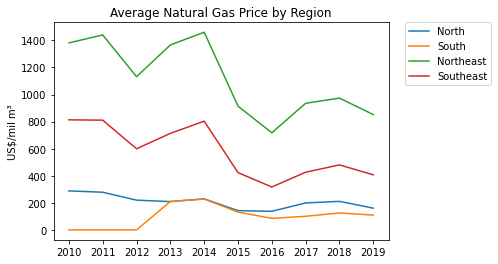

In [728]:
avg_price_region.df.T.plot()
plt.title(avg_price_region.title)
plt.legend()
plt.ylabel(avg_price_region.unit)
plt.yticks(np.arange(0, yticks_max, 200))
plt.xticks(np.arange(2010,2020,1));
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

### Domestic Sale by Region

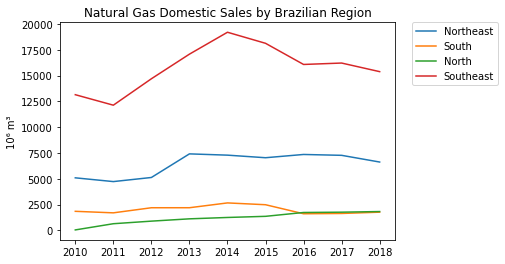

In [794]:
domestic_sale.df.loc[['Northeast','South','North','Southeast'],:].T.plot();
domestic_sale.drop_last_column()
plt.ylabel(domestic_sale.unit);
plt.title('Natural Gas Domestic Sales by Brazilian Region');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

### Associated and Non Associated Gas Production

In [561]:
gas_type_ymax = gas_type.df.xs('Associated', level=1).sum().max()

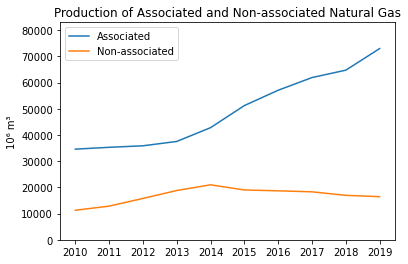

In [562]:
gas_type.df.xs('Associated', level=1).sum().plot(label='Associated');
gas_type.df.xs('Non-associated', level=1).sum().plot(label='Non-associated');
plt.xticks(np.arange(2010,2020,1));
plt.ylim(0,gas_type_ymax+10000)
plt.title('Production of Associated and Non-associated Natural Gas')
plt.ylabel(gas_type.unit)
plt.legend();

### Production by Layer

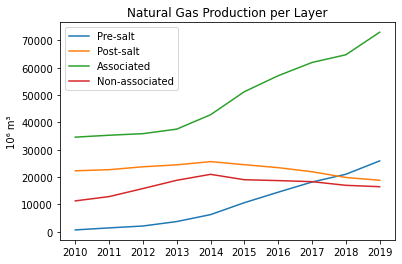

In [563]:
production.df.iloc[3].T.plot(label='Pre-salt');
production.df.iloc[4].T.plot(label='Post-salt');
gas_type.df.xs('Associated', level=1).sum().plot(label='Associated');
gas_type.df.xs('Non-associated', level=1).sum().plot(label='Non-associated');
plt.xticks(np.arange(2010,2020,1));
plt.legend();
plt.ylabel(production.unit);
plt.title('Natural Gas Production per Layer');

### Balance

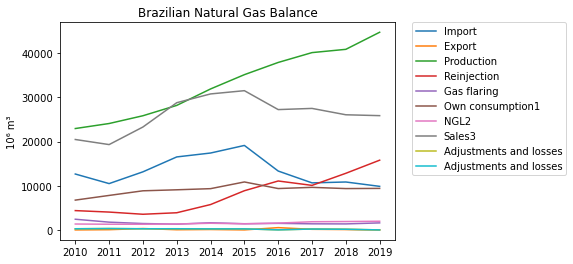

In [564]:
balance.df.T.plot();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.xticks(np.arange(2010,2020,1));
plt.ylabel('10⁶ m³');
plt.title('Brazilian Natural Gas Balance');

#### Balance 2019

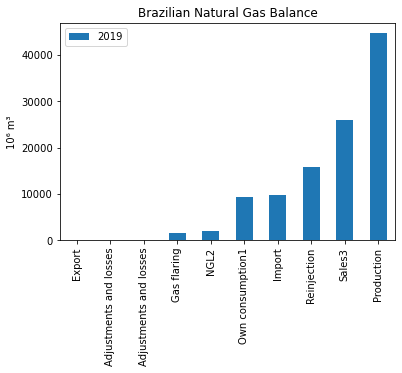

In [565]:
balance_2019 = balance.df.loc[:,2019].T.sort_values()
balance_2019.plot.bar();
plt.legend();
plt.ylabel('10⁶ m³');
plt.title('Brazilian Natural Gas Balance');

#### Import and Production

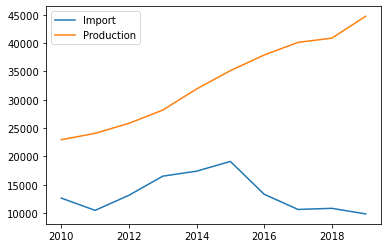

In [799]:
supply.plot();

#### Consume

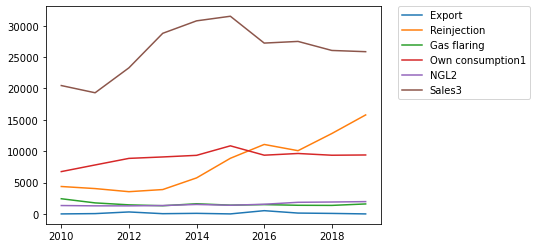

In [568]:
demand.plot();
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

## Demand ML

In [800]:
demand.sum(axis=1)

2010    35324.176812
2011    34241.142880
2012    38715.187190
2013    44421.633965
2014    49058.123000
2015    54000.577479
2016    51196.198989
2017    50560.624178
2018    51550.107133
2019    54575.447061
dtype: float64

#### Demand and Supply

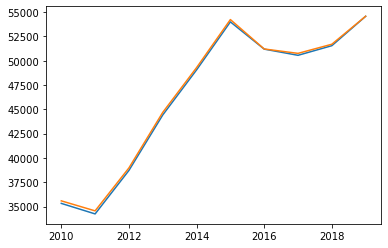

In [569]:
demand.sum(axis=1).plot();
supply.sum(axis=1).plot();

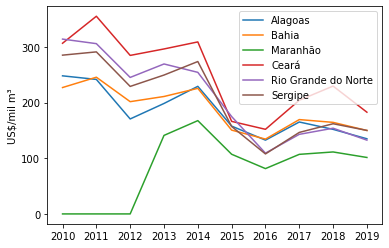

In [570]:
for state in northeast:
    avg_price.df.loc[state].plot();
    plt.ylabel(avg_price.unit)
    plt.legend(loc='best')
    plt.xticks(np.arange(2010,2020,1))
    plt.yticks(np.arange(0,avg_price.df.max().max(),100))


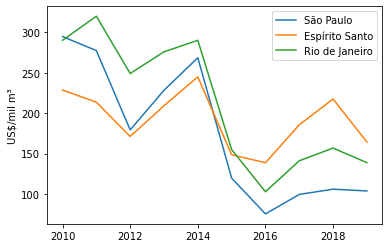

In [571]:
for state in southeast:
    avg_price.df.loc[state].plot();
    plt.ylabel(avg_price.unit)
    plt.legend(loc='best')

### Energy Matrix

In [572]:
energy_matrix

Year                                    2000                              \
Month                                     1             2             3    
Energy Type                                                                
Biomassas                           0.000000      0.000000      0.000000   
Carvao                            772.954908    726.482505    685.798458   
Energia produzida fora do SIN            NaN           NaN  20670.975000   
Eolicas                             0.000000      0.000000      0.000000   
Gas Natural                       512.536500    580.842549    513.065176   
Hidreletricas exclusive Itaipu  21074.749841  20519.823366  21184.922627   
Itaipu                           6523.780292   6362.831799   7593.289824   
Nuclear                           418.609402    400.617872    400.187101   
Oleo Diesel / Combustivel         112.026593     69.214905     78.197350   
Residuos Processos Industriais      0.000000      0.000000      0.000000   
Solar Fotovoltaica                       NaN           NaN           NaN   

Year                                                                 \
Month                                  4           5             6    
Energy Type                                                           
Biomassas                        358.8856      0.0000      0.000000   
Carvao                             0.0000    725.8747    725.001500   
Energia produzida fora do SIN      0.0000         NaN           NaN   
Eolicas                            0.0000      0.0000      0.000000   
Gas Natural                      675.6017    503.2255    574.331600   
Hidreletricas exclusive Itaipu  7128.3002  21986.3235  20503.398688   
Itaipu                            39.2871   6814.9694   6928.030200   
Nuclear                            0.0000      0.0000      0.011100   
Oleo Diesel / Combustivel        337.4032    101.4555    105.998400   
Residuos Processos Industriais     0.0000      0.0000      0.000000   
Solar Fotovoltaica                    NaN         NaN           NaN   

Year                                                                  \
Month                                    7           8            9    
Energy Type                                                            
Biomassas                           0.00000      0.0000      0.00000   
Carvao                            607.47140    627.4963    397.34310   
Energia produzida fora do SIN           NaN         NaN          NaN   
Eolicas                             0.00000      0.0000      0.00000   
Gas Natural                       540.09250    547.1182    500.28480   
Hidreletricas exclusive Itaipu  20243.01143  20366.1559  19379.09209   
Itaipu                           7423.09770   7431.3229   8093.23684   
Nuclear                            67.88070    672.3908    781.17160   
Oleo Diesel / Combustivel         130.20700    127.6278     80.34823   
Residuos Processos Industriais      0.00000      0.0000      0.00000   
Solar Fotovoltaica                      NaN         NaN          NaN   

Year                                          ...          2018                \
Month                                     10  ...            9             10   
Energy Type                                   ...                               
Biomassas                           0.000000  ...    906.250506    803.887412   
Carvao                            337.300572  ...   1202.453353   1072.563044   
Energia produzida fora do SIN            NaN  ...    244.488764    332.856552   
Eolicas                             0.000000  ...   5138.397764   4306.121173   
Gas Natural                       551.155034  ...   5240.852556   4194.910667   
Hidreletricas exclusive Itaipu  22529.277220  ...  22377.000000  25249.350506   
Itaipu                           7495.719297  ...   5219.000000   7234.961361   
Nuclear                           537.460912  ...   1448.836759   1361.985466   
Oleo Diesel / Combustivel          70.41

# Eletric Energy by Source

#### Eletric Energy DataFrame

In [573]:
energy = energy_matrix.sum(axis=1, level=0).copy()
energy.index = ['Biomass','Coal','Energy Produced Out of SIN','Eolic','Natural Gas','Hidrelectric','Itaipu','Nuclear','Diesel/Oil','Waste Industrial Processes','Solar']
energy = energy.T
energy['Hydroelectric'] = energy.loc[:,'Itaipu']+energy.loc[:,'Hidrelectric']
energy.drop(['Hidrelectric','Itaipu'], axis=1, inplace=True)
energy.drop(2019,inplace=True)

### Electric Energy by Source Area Plot

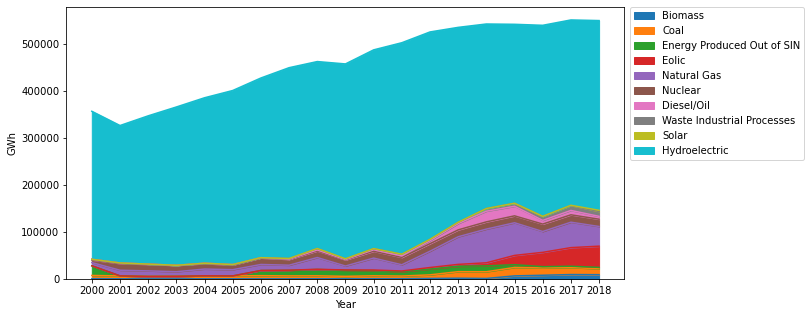

In [574]:
energy.plot(kind='area', figsize=(10,5));
plt.xticks(np.arange(2000,2019,1));
plt.ylabel('GWh');
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

### Proportions

In [575]:
prop = energy.T.div(energy.sum(axis=1)).copy()
prop = prop.T

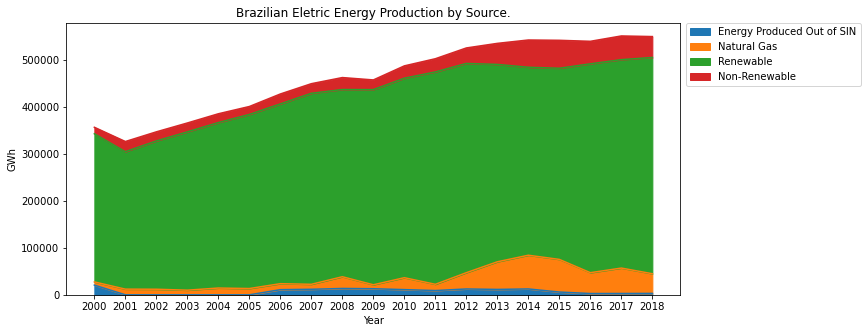

In [576]:
energy_type = energy.copy()
energy_type['Renewable']=energy['Biomass']+energy['Hydroelectric']+energy['Eolic']+energy['Solar']
energy_type['Non-Renewable']=energy['Diesel/Oil']+energy['Coal']+energy['Nuclear']+energy['Waste Industrial Processes']
energy_type.drop(['Biomass','Hydroelectric','Eolic','Solar','Diesel/Oil','Coal','Nuclear','Waste Industrial Processes'], axis=1, inplace=True)
energy_type.plot(kind='area', stacked=True, figsize=(11,5))
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.);
plt.ylabel('GWh');
plt.xticks(np.arange(2000,2019,1));
plt.title('Brazilian Eletric Energy Production by Source.');

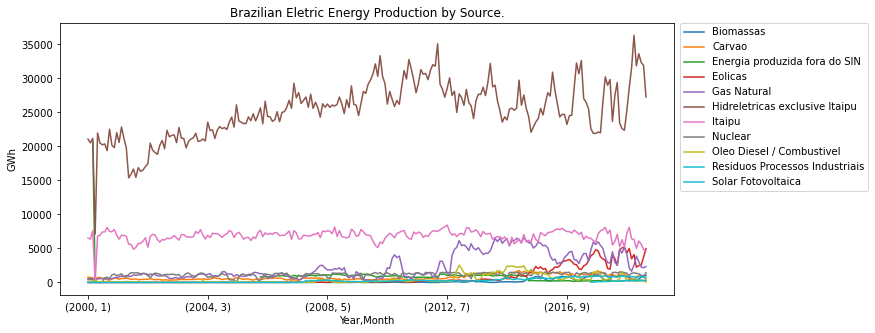

In [577]:
energy_matrix.T.plot(figsize=(11,5), colormap='tab10')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.);
plt.ylabel('GWh');
plt.title('Brazilian Eletric Energy Production by Source.');

####

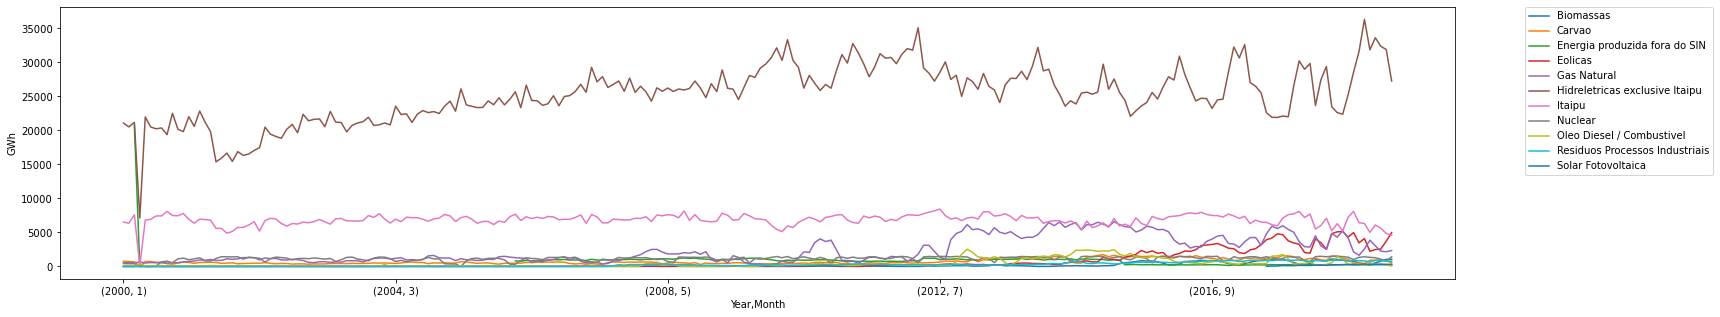

In [580]:
energy_matrix.T.plot(figsize=(25,5));
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);
plt.ylabel('GWh');

In [581]:
energy_source = energy_matrix.loc[:,2018].sum(axis=1)
energy_source.index = ['Biomass','Coal','Energy Produced Out of SIN','Eolic','Natural Gas', 'Hidrelectric','Itaipu','Nuclear','Diesel/Oil','Waste Industrial Processes','Solar']
energy_source.drop(['Hidrelectric','Itaipu'], inplace=True)
energy_source

Biomass                        8746.024599
Coal                          12567.356132
Energy Produced Out of SIN     2974.635287
Eolic                         45148.016764
Natural Gas                   41833.510312
Nuclear                       15474.412837
Diesel/Oil                     6103.918949
Waste Industrial Processes    10360.136166
Solar                          2526.204816
dtype: float64

In [582]:
energy_source['Hidrelectric'] = (energy_matrix.loc['Itaipu',2018]+energy_matrix.loc['Hidreletricas exclusive Itaipu',2018]).sum()
energy_source.sort_values(inplace=True)

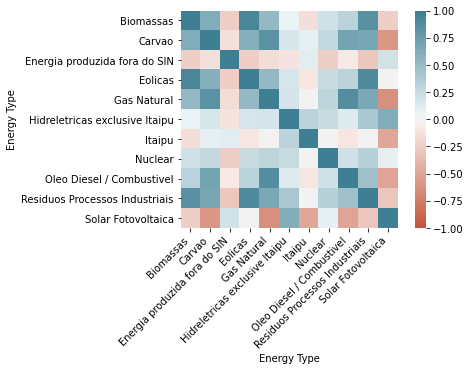

In [584]:
corr = energy_matrix.T.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);